# Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [90]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

%matplotlib inline

In [1]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
connection = pg.connect(user="mp_quantri",
                                  password="asdaw@23423das",
                                  host="101.96.116.82",
                                  port="8182",
                                  database="tintuc_haisan")

ModuleNotFoundError: No module named 'psycopg2'

In [7]:
def load_data(file,c=connection):
    filename='select * from public.'+file
    data = pd.read_sql_query(filename, c)
    #data = pd.read_sql_query('select * from public.bang_tong_hop', connection)
    return data

In [8]:
#1. hungpq_mp_cost_price # cp
#2. hungpq_mp_material_price # mp
#3. hungpq_mp_material_quantity_order # mqo
#4. hungpq_mp_material_quantity_purchase # mqp
#5. hungpq_mp_product_price # pp
#6. hungpq_mp_product_price_ring # ppr

# Save datasets
#for file in files:
#    df=load_data(file,c=connection)
#    df.to_csv(file+'.csv',index=False)
    
files=[
'hungpq_mp_cost_price',
'hungpq_mp_material_price',
'hungpq_mp_material_quantity_order',
'hungpq_mp_material_quantity_purchase',
'hungpq_mp_product_price',
'hungpq_mp_product_price_ring']

In [9]:
datasets={}
for file in files:
    df=load_data(file,c=connection)
    datasets[file]=df

In [10]:
dfp_cost=datasets['hungpq_mp_cost_price']
dfp_material=datasets['hungpq_mp_material_price']
dfp_product=datasets['hungpq_mp_product_price']
dfp_ring=datasets['hungpq_mp_product_price_ring']
dfm_order=datasets['hungpq_mp_material_quantity_order']
dfm_purchase=datasets['hungpq_mp_material_quantity_purchase']


# Price 

In [11]:
#dfp_cost.head(2) # datasets['hungpq_mp_cost_price']
#dfp_cost=dfp_cost[dfp_cost.columns[:10]]
dfp_cost=dfp_cost[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_cost.head(2) #dfp_costs: s tandard_type, standard_size, price (USD/kg), active_date

In [12]:
#dfp_product.head(2)#datasets['hungpq_mp_product_price']
#dfp_product=dfp_product[dfp_product.columns[:12]]
dfp_product=dfp_product[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_product.head(2)# dfp_product: standard_type, standard_size, price (USD/kg), active_date

In [13]:
#dfp_ring.head(2)#datasets['hungpq_mp_product_price_ring']
#dfp_ring=dfp_ring[dfp_ring.columns[:11]]
dfp_ring=dfp_ring[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_ring.head(2)# dfp_ring: standard_type, standard_size, price (USD/Ring),active_date

In [14]:
#dfp_material.head(2)#datasets['hungpq_mp_material_price']
dfp_material=dfp_material[dfp_material.columns[:6]]
#dfp_material.head(2) # standard_type, standard_size, price (1000kVND/kg),factory, active_date
dfp_material_hg=dfp_material[dfp_material['factory']=='Hậu Giang']
dfp_material_cm=dfp_material[dfp_material['factory']=='Cà Mau']
dfp_material_hg=dfp_material_hg[['standard_type', 'standard_size', 'price', 'active_date']]
dfp_material_cm=dfp_material_cm[['standard_type', 'standard_size', 'price', 'active_date']]

In [65]:
#dfp_material_hg.head(2)

In [64]:
#dfp_material_cm.head(2)

### Price: ['standard_type', 'standard_size', 'price', 'active_date']

In [73]:
# Price: ['standard_type', 'standard_size', 'price', 'active_date']
# dfp_cost, dfp_material_hg,dfp_material_cm,# dfp_product,dfp_ring,

#### dfp_cost

In [74]:
#list(dfp_cost['active_date'].unique())

In [50]:
dfp_cost.head()

,standard_type,standard_size,price,active_date
0,Sú sinh thái,2/4,15.30,2020-01-09
1,Sú sinh thái,2/4,16.24,2020-01-09
2,Sú sinh thái,2/4,16.69,2020-01-09
3,Sú sinh thái,2/4,17.05,2020-01-09
4,Sú sinh thái,2/4,17.51,2020-01-09


In [54]:
start_date =dfp_cost['active_date'].min()
end_date = dfp_cost['active_date'].max()
dfp_cost= dfp_cost[(dfp_cost['active_date'] >= start_date)& (dfp_cost['active_date'] < end_date)]

In [55]:
dfp_cost_group=dfp_cost.groupby(['standard_type','standard_size'])

In [56]:
list_group_name=[]
list_group_df=[]
for name, g in dfp_cost_group:
    #print(name)
    list_group_name.append(name)
    list_group_df.append(g.groupby('active_date').mean())

In [57]:
list_group_name[0]

('Sú sinh thái', '13/15')

In [58]:
df=list_group_df[0]
df=df.rename(columns={'price':'price'+str(0)})

In [59]:
for i in range(1,len(list_group_df)):
    df['price'+str(i)]=list_group_df[i]

In [60]:
df.head()

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,price12
active_date,,,,,,,,,,,,,
2018-06-08,9.2400,7.329,17.556,6.3890,5.2690,4.5620,17.1720,4.286,4.191,15.3510,4.054,3.989,11.7780
2018-06-09,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-10,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-12,9.2055,7.351,17.524,6.4225,5.3035,4.6205,17.1395,4.403,4.324,15.3170,4.189,4.069,11.7450
2018-06-14,9.1390,7.284,17.461,6.3555,5.2370,4.6070,17.0735,4.403,4.324,15.2515,4.189,4.069,11.6785


In [62]:
df.isnull().sum().sum()

0

In [63]:
#df.to_csv('dfp_cost.csv')

In [64]:
df.head()

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,price12
active_date,,,,,,,,,,,,,
2018-06-08,9.2400,7.329,17.556,6.3890,5.2690,4.5620,17.1720,4.286,4.191,15.3510,4.054,3.989,11.7780
2018-06-09,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-10,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-12,9.2055,7.351,17.524,6.4225,5.3035,4.6205,17.1395,4.403,4.324,15.3170,4.189,4.069,11.7450
2018-06-14,9.1390,7.284,17.461,6.3555,5.2370,4.6070,17.0735,4.403,4.324,15.2515,4.189,4.069,11.6785


In [47]:
list_type=list(dfp_cost['standard_type'].unique())
list_size=list(dfp_cost['standard_size'].unique())

In [16]:
dfp_cost_type_size=dfp_cost[(dfp_cost['standard_type']==list_type[0])&(dfp_cost['standard_size']==list_size[0])]
dfp_cost_type=dfp_cost[dfp_cost['standard_type']==list_type[0]]

In [48]:
dfp_cost_type_size['active_date'].min()

datetime.date(2018, 6, 8)

In [49]:
start_date =dfp_cost_type_size['active_date'].min()
end_date = dfp_cost_type_size['active_date'].max()

In [19]:
dfp_cost_type_size= dfp_cost_type_size[(dfp_cost_type_size['active_date'] >= start_date) 
                                       & (dfp_cost_type_size['active_date'] < end_date)]

In [67]:
df0=df['price0']

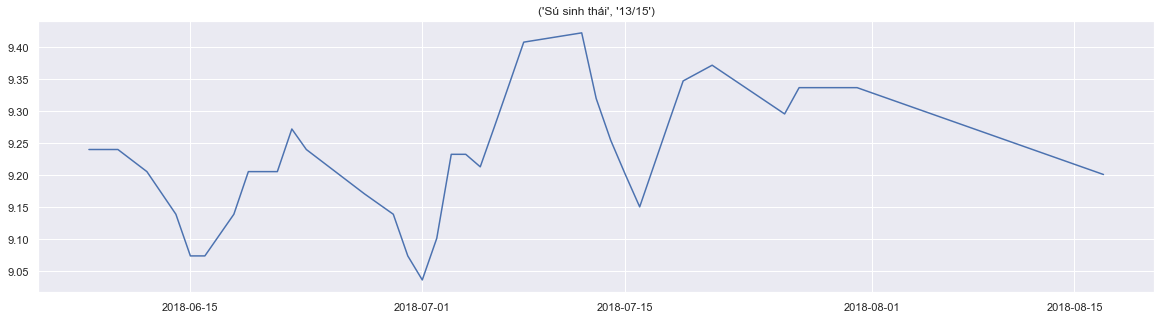

In [76]:
plt.figure(figsize=(20, 5))
plt.plot(df0)
plt.title(list_group_name[0])
plt.grid(True)
plt.show()


In [88]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

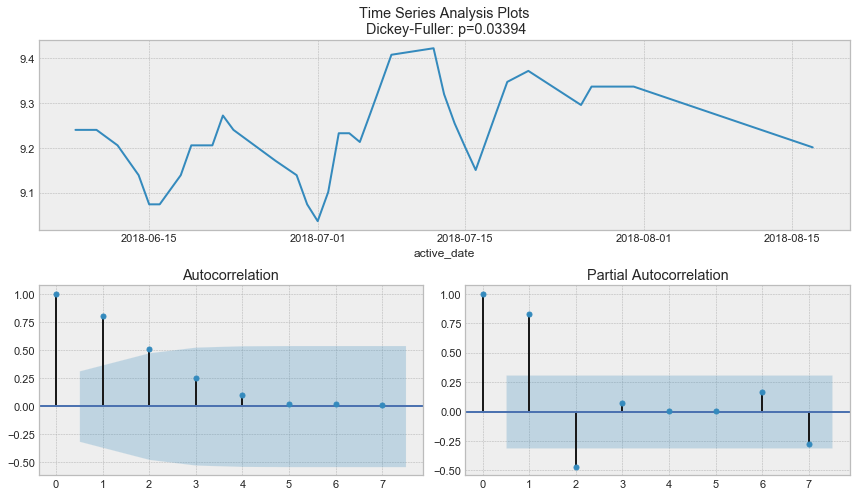

In [91]:
tsplot(df0, lags=7)

In [151]:
df0.iloc[:20]

active_date
2018-06-08      9.24
2018-06-09      9.24
2018-06-10      9.24
2018-06-12    9.2055
2018-06-14     9.139
2018-06-15     9.074
2018-06-16     9.074
2018-06-18     9.139
2018-06-19    9.2055
2018-06-20    9.2055
2018-06-21    9.2055
2018-06-22     9.272
2018-06-23      9.24
2018-06-27     9.171
2018-06-29     9.139
2018-06-30     9.074
2018-07-01    9.0365
2018-07-02    9.1015
2018-07-03    9.2325
2018-07-04    9.2325
Name: price0, dtype: object

In [147]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 7 # season length is still 7

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [148]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(df0.iloc[:20], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [149]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [146]:
result_table.head()

,parameters,aic
0,"(2, 2, 0, 0)",-69.461106
1,"(2, 2, 0, 1)",-66.938374
2,"(2, 2, 1, 1)",-66.799276
3,"(2, 4, 0, 1)",-66.552972
4,"(2, 4, 1, 1)",-65.565196


In [98]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(df0, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                            price0   No. Observations:                   39
Model:             SARIMAX(2, 1, 2)x(0, 1, 0, 7)   Log Likelihood                  39.731
Date:                           Sun, 26 Apr 2020   AIC                            -69.461
Time:                                   12:09:59   BIC                            -62.291
Sample:                                        0   HQIC                           -67.124
                                            - 39                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7154      0.088     19.393      0.000       1.542       1.889
ar.L2         -0.9886      0.038    -25.761

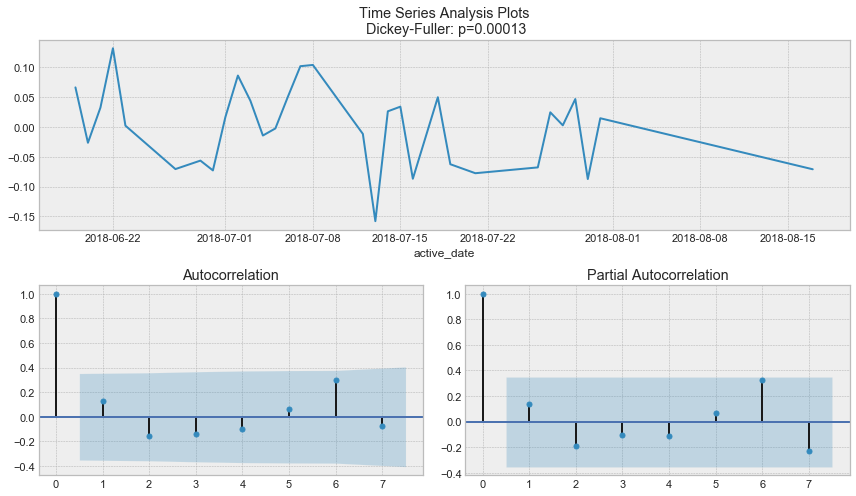

In [100]:
tsplot(best_model.resid[7+1:], lags=7)

In [103]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [175]:
n_steps=38
#forecast = best_model.predict(start = df0.shape[0], end = df0.shape[0]+n_steps)
forecast = best_model.predict(start = 0, end = 0+n_steps)

In [177]:
forecast.shape

(39,)

In [167]:
df_fc=df['price0']

In [142]:
fc['forecast']=df['price0']

In [186]:
#df_forecast=pd.DataFrame([df.iloc[:,0],forecast],columns=["actual","forecast"])
df_forecast=pd.DataFrame(columns=["actual","forecast"])

In [190]:
#df_forecast

In [188]:
df_forecast['actual']=df.iloc[:,0]

In [191]:
df_forecast['forecast']=forecast

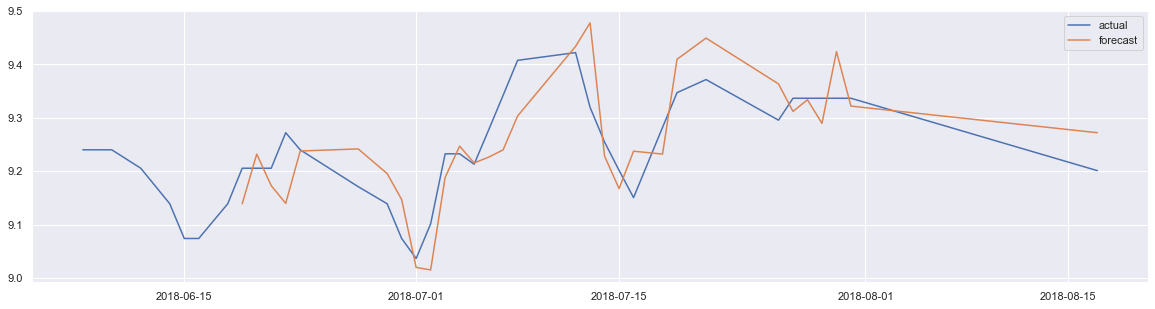

In [199]:
plt.figure(figsize=(20, 5))
plt.plot(df_forecast['actual'],label="actual")#.plot()
plt.plot(df_forecast['forecast'],label="forecast")
plt.legend()
plt.show()

In [120]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
   # error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    #plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
   # plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    #plt.grid(True);

ConversionError: Failed to convert value(s) to axis units: array([datetime.date(2018, 6, 8), datetime.date(2018, 6, 9),
       datetime.date(2018, 6, 10), datetime.date(2018, 6, 12),
       datetime.date(2018, 6, 14), datetime.date(2018, 6, 15),
       datetime.date(2018, 6, 16), datetime.date(2018, 6, 18),
       datetime.date(2018, 6, 19), datetime.date(2018, 6, 20),
       datetime.date(2018, 6, 21), datetime.date(2018, 6, 22),
       datetime.date(2018, 6, 23), datetime.date(2018, 6, 27),
       datetime.date(2018, 6, 29), datetime.date(2018, 6, 30),
       datetime.date(2018, 7, 1), datetime.date(2018, 7, 2),
       datetime.date(2018, 7, 3), datetime.date(2018, 7, 4),
       datetime.date(2018, 7, 5), datetime.date(2018, 7, 6),
       datetime.date(2018, 7, 7), datetime.date(2018, 7, 8),
       datetime.date(2018, 7, 12), datetime.date(2018, 7, 13),
       datetime.date(2018, 7, 14), datetime.date(2018, 7, 15),
       datetime.date(2018, 7, 16), datetime.date(2018, 7, 18),
       datetime.date(2018, 7, 19), datetime.date(2018, 7, 21),
       datetime.date(2018, 7, 26), datetime.date(2018, 7, 27),
       datetime.date(2018, 7, 28), datetime.date(2018, 7, 29),
       datetime.date(2018, 7, 30), datetime.date(2018, 7, 31),
       datetime.date(2018, 8, 17), 40, 41, 42, 43, 44, 45, 46, 47],
      dtype=object)

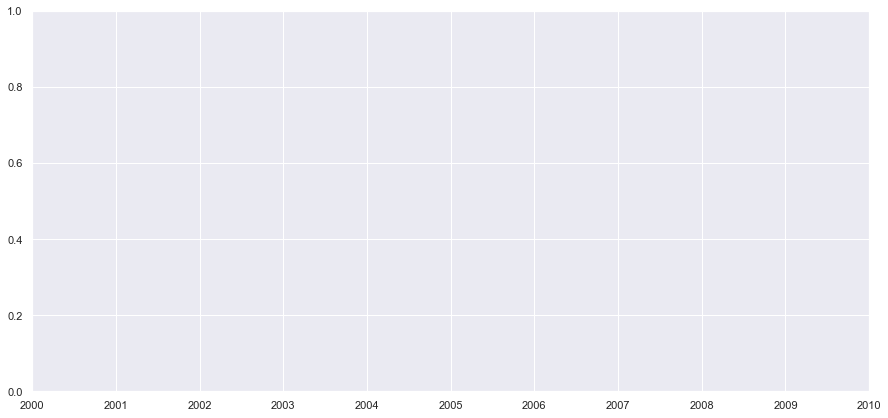

In [121]:
plotSARIMA(df0, best_model, 7)

In [77]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [79]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [82]:
from scipy.optimize import minimize  

In [87]:
%%time
data = df0[:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 7, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 10, scaling_factor = 3)
model.triple_exponential_smoothing()

ZeroDivisionError: float division by zero

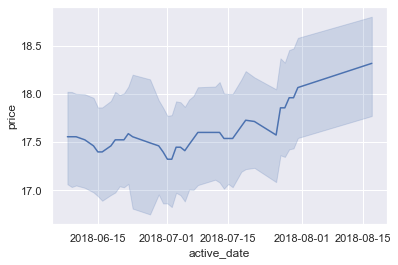

In [20]:
ax = sns.lineplot(x="active_date", y="price", markers=True,data=dfp_cost_type_size)

In [21]:
start_date =dfp_cost_type['active_date'].min()
end_date = dfp_cost_type['active_date'].max()
dfp_cost_type= dfp_cost_type[(dfp_cost_type['active_date'] >= start_date) 
                                       & (dfp_cost_type['active_date'] < end_date)]



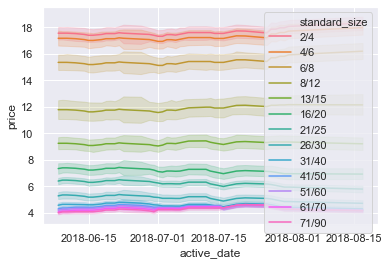

In [26]:
ax = sns.lineplot(x="active_date", y="price", hue="standard_size",data=dfp_cost_type)

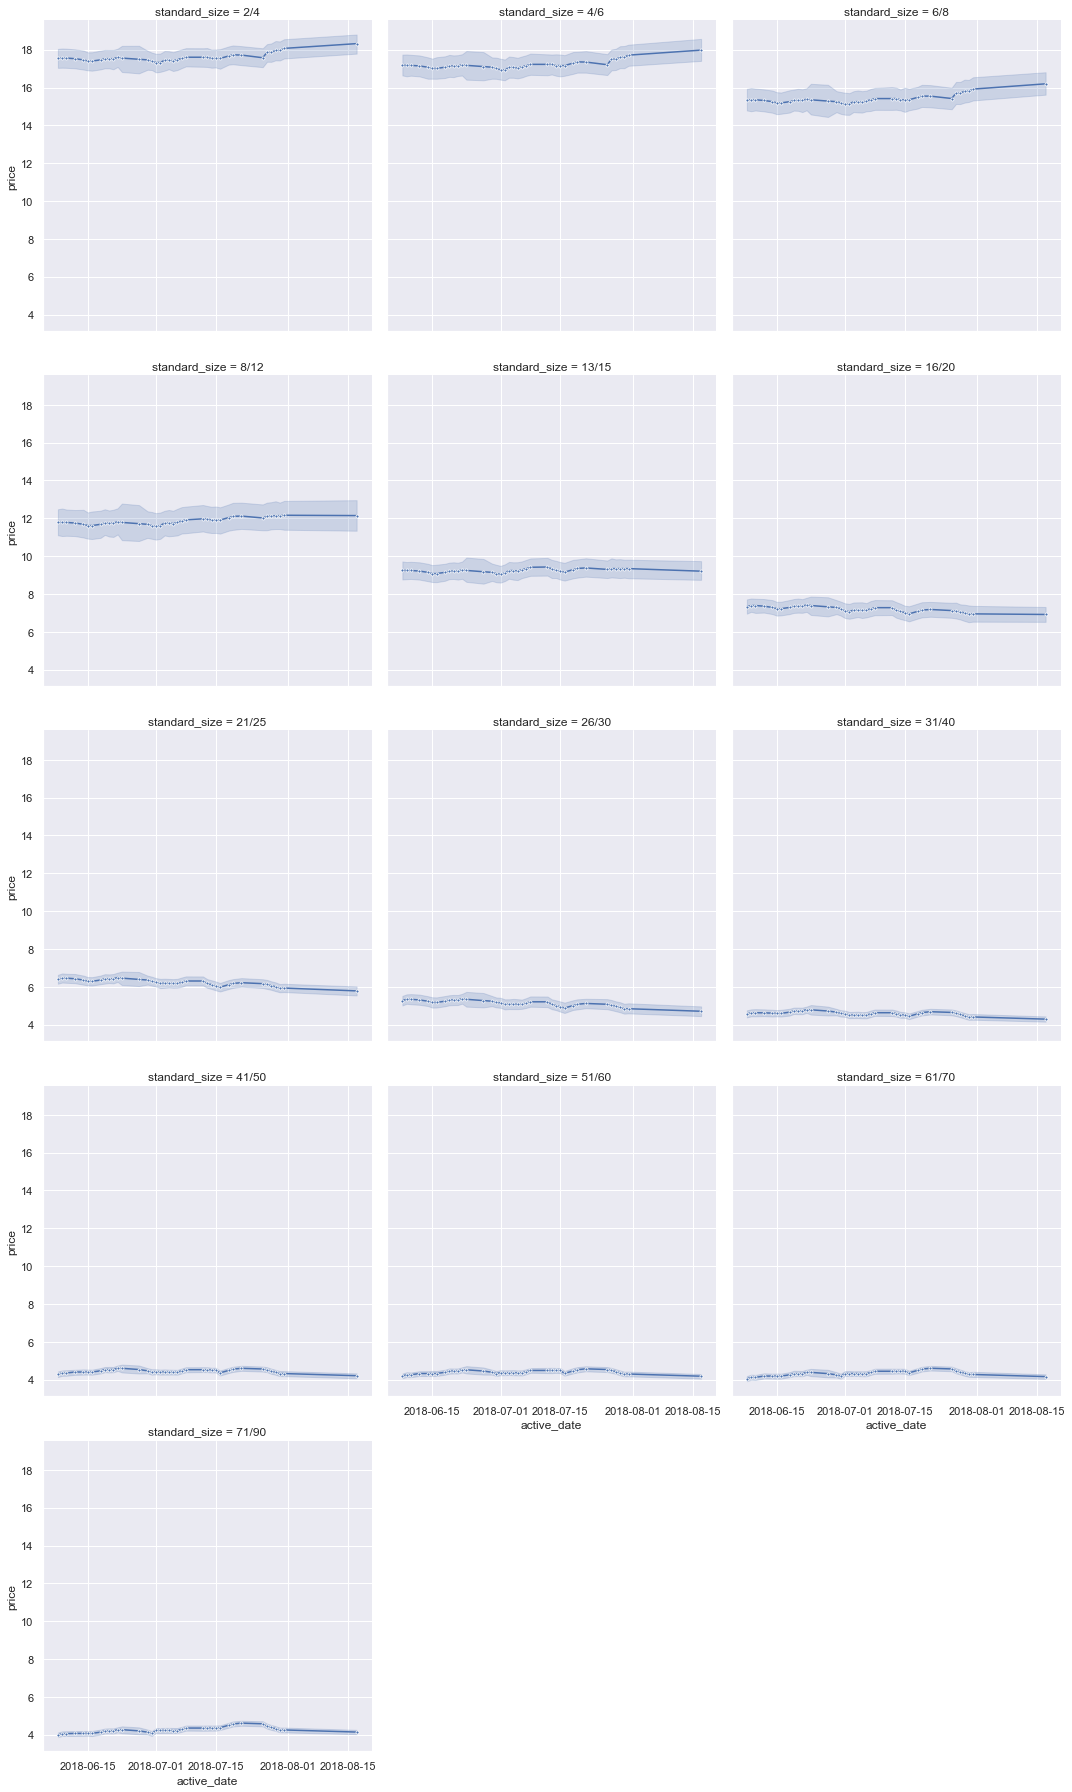

In [24]:
g = sns.FacetGrid(dfp_cost_type, col="standard_size", col_wrap=3, height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

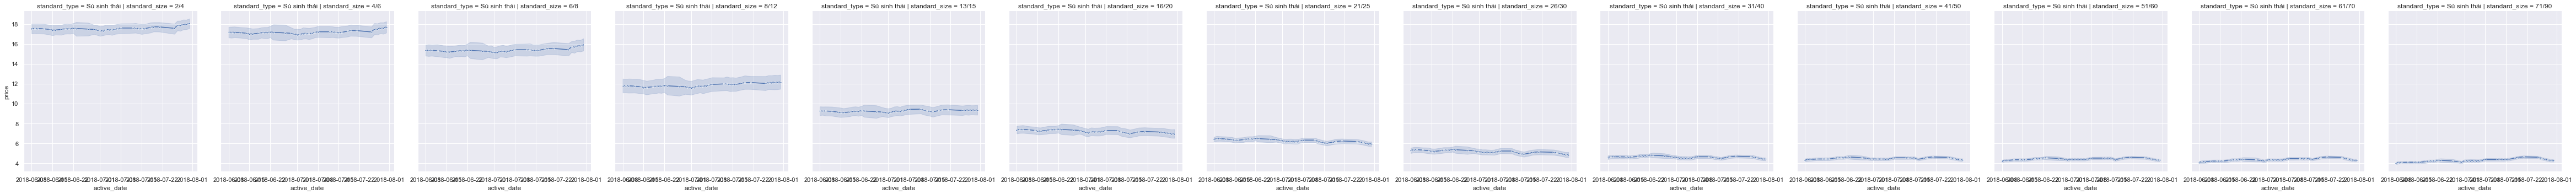

In [42]:
start_date =dfp_cost['active_date'].min()
end_date = dfp_cost['active_date'].max()
dfp_cost= dfp_cost[(dfp_cost['active_date'] >= start_date)  & (dfp_cost['active_date'] < end_date)]

g = sns.FacetGrid(dfp_cost, col="standard_size",row="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

#### dfp_material_hg

In [64]:
#list(dfp_material_hg['active_date'].unique())

In [46]:
start_date =dfp_material_hg['active_date'].min()
end_date = dfp_material_hg['active_date'].max()
dfp_material_hg= dfp_material_hg[(dfp_material_hg['active_date'] >= start_date) 
                                       & (dfp_material_hg['active_date'] < end_date)]

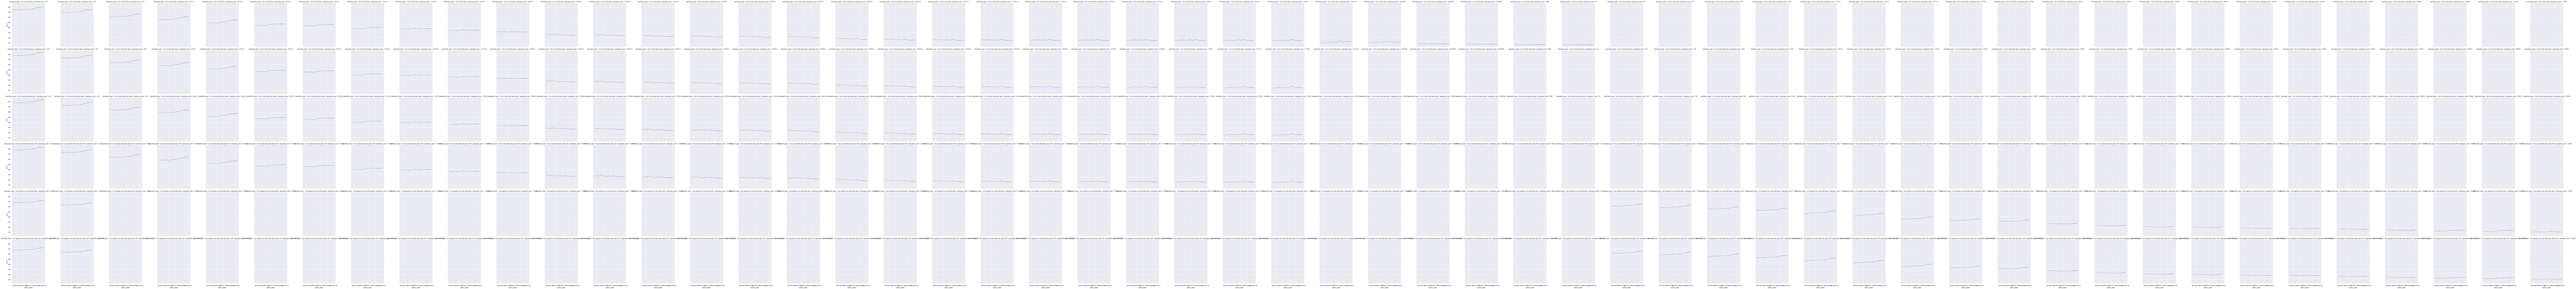

In [47]:
g = sns.FacetGrid(dfp_material_hg, col="standard_size",row="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

In [49]:
list_type=list(dfp_material_hg['standard_type'].unique())
list_size=list(dfp_material_hg['standard_size'].unique())

In [50]:
dfp_material_hg_type_size=dfp_material_hg[(dfp_material_hg['standard_type']==list_type[0])
                                          &(dfp_material_hg['standard_size']==list_size[0])]

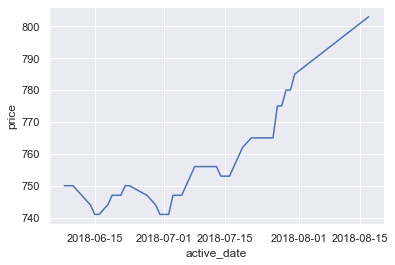

In [51]:
ax = sns.lineplot(x="active_date", y="price", markers=True,data=dfp_material_hg_type_size)

In [52]:
dfp_material_hg_size=dfp_material_hg[(dfp_material_hg['standard_size']==list_size[0])]

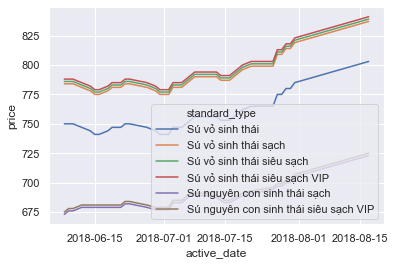

In [58]:
ax = sns.lineplot(x="active_date", y="price", hue="standard_type",data=dfp_material_hg_size)

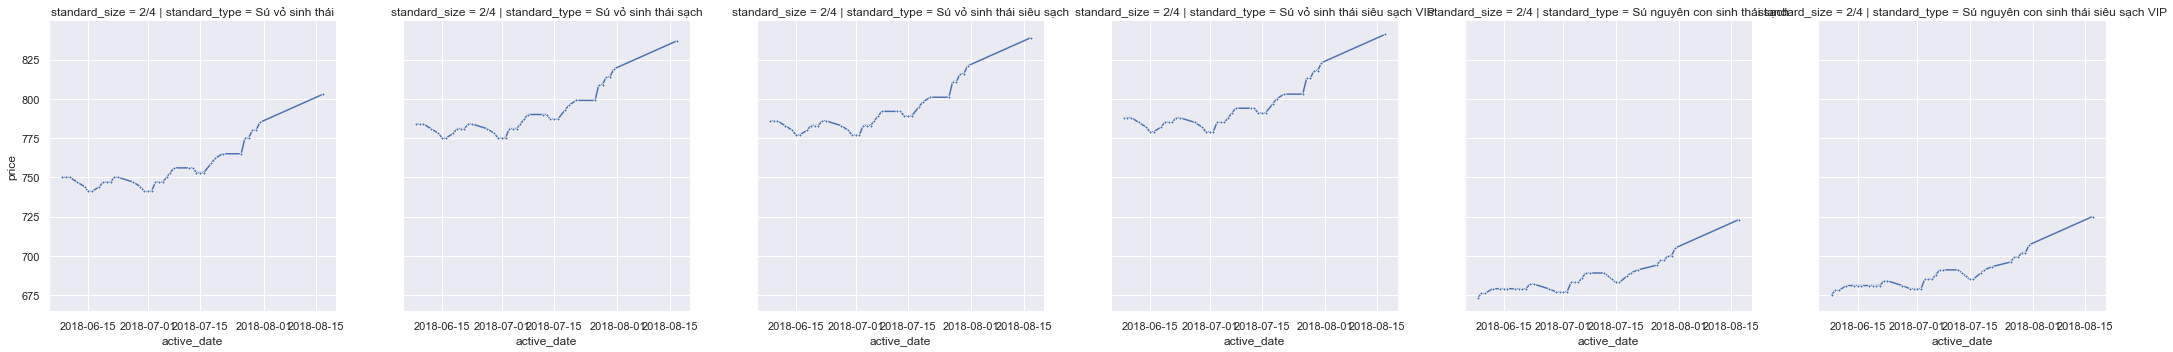

In [60]:
g = sns.FacetGrid(dfp_material_hg_size, row="standard_size",col="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

In [61]:
#### dfp_material_cm

In [63]:
#list(dfp_material_cm['active_date'].unique())

In [65]:
start_date =dfp_material_cm['active_date'].min()
end_date = dfp_material_cm['active_date'].max()
dfp_material_cm= dfp_material_cm[(dfp_material_cm['active_date'] >= start_date) 
                                       & (dfp_material_cm['active_date'] < end_date)]

In [66]:
list_type=list(dfp_material_cm['standard_type'].unique())
list_size=list(dfp_material_cm['standard_size'].unique())

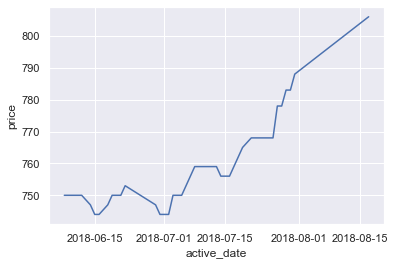

In [67]:
dfp_material_cm_type_size=dfp_material_cm[(dfp_material_cm['standard_type']==list_type[0])
                                          &(dfp_material_cm['standard_size']==list_size[0])]
ax = sns.lineplot(x="active_date", y="price", markers=True,data=dfp_material_cm_type_size)

In [69]:
dfp_material_cm_size=dfp_material_cm[(dfp_material_cm['standard_size']==list_size[0])]

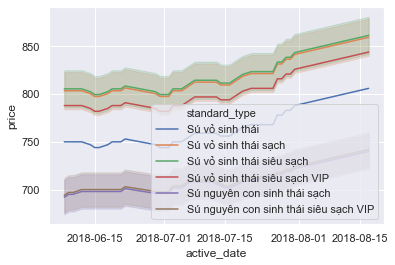

In [70]:
ax = sns.lineplot(x="active_date", y="price", hue="standard_type",data=dfp_material_cm_size)

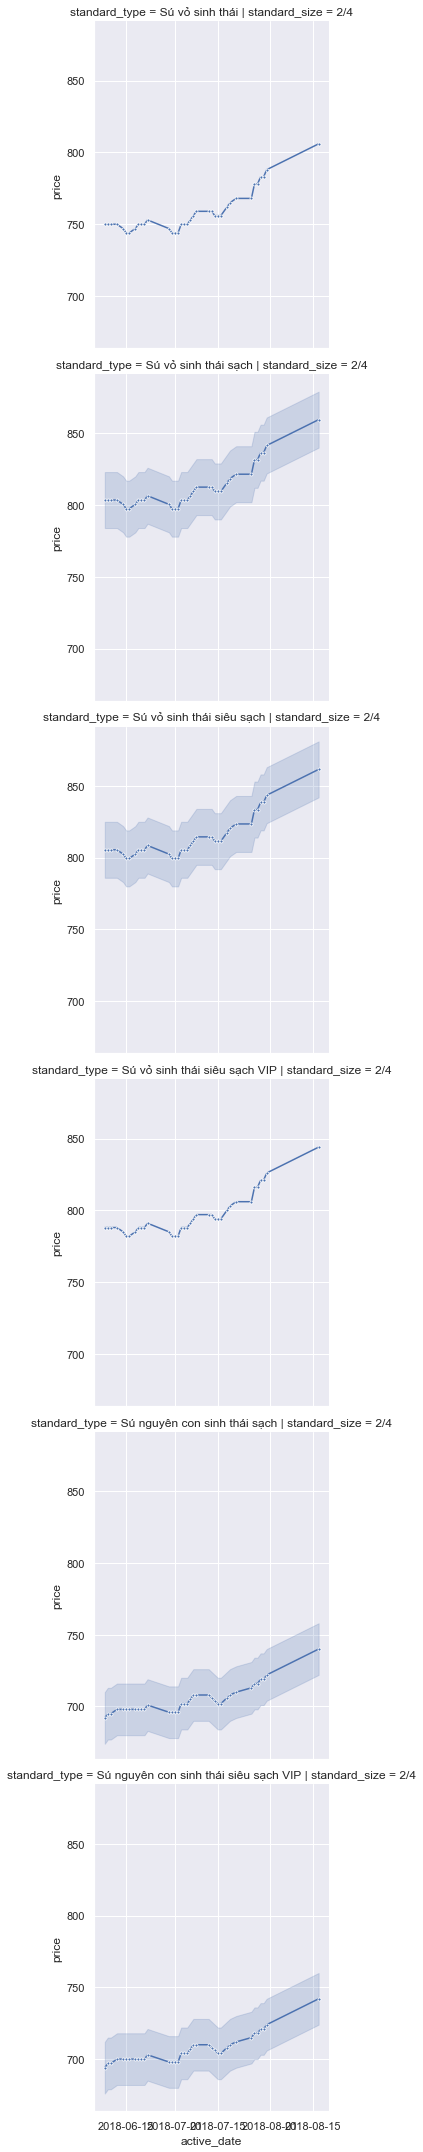

In [72]:
g = sns.FacetGrid(dfp_material_cm_size, col="standard_size",row="standard_type", height=5)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

#### dfp_ring

In [44]:
list(dfp_ring['active_date'].unique()) # one days

[datetime.date(2019, 9, 23)]

#### dfp_product

In [37]:
list(dfp_product['active_date'].unique()) # two days

[datetime.date(2019, 9, 12), datetime.date(2019, 9, 23)]

In [39]:
#g = sns.FacetGrid(dfp_product, row="standard_size",col='standard_type',  height=4)
#g = g.map(sns.lineplot, "active_date", "price", marker=".")

# Material

In [75]:
#dfm_order.head(2)#=datasets['hungpq_mp_material_quantity_order']
dfm_order=dfm_order[dfm_order.columns[:6]]
dfm_order_hg=dfm_order[dfm_order['factory']=='Hậu Giang']
dfm_order_hg=dfm_order_hg[['type','size','quantity','active_date']]
dfm_order_cm=dfm_order[dfm_order['factory']=='Cà Mau']
dfm_order_cm=dfm_order_cm[['type','size','quantity','active_date']]

In [81]:
#dfm_order_hg.head(2)
list(dfm_order_hg['active_date'].unique())# 2019 and 2020
list_type=list(dfm_order_hg['type'].unique()) # 3
list_size=list(dfm_order_hg['size'].unique()) #140

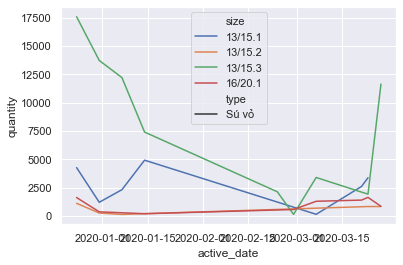

In [91]:
i=5
dfm_order_hg_size=dfm_order_hg[dfm_order_hg['size'].isin(list_size[:4])]
ax = sns.lineplot(x="active_date", y="quantity", hue="size",style="type",data=dfm_order_hg_size)

In [93]:
# dfm_order_cm.head(2)
#list(dfm_order_cm['active_date'].unique())# 2019 and 2020
list_type=list(dfm_order_cm['type'].unique()) # 3
list_size=list(dfm_order_cm['size'].unique()) #140

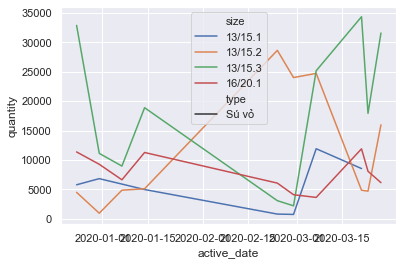

In [94]:
i=5
dfm_order_cm_size=dfm_order_cm[dfm_order_cm['size'].isin(list_size[:4])]
ax = sns.lineplot(x="active_date", y="quantity", hue="size",style="type",data=dfm_order_cm_size)

In [95]:
#dfm_purchase.head(2)#datasets['hungpq_mp_material_quantity_purchase']
dfm_purchase=dfm_purchase[dfm_purchase.columns[:6]]
dfm_purchase_hg=dfm_purchase[dfm_purchase['factory']=='Hậu Giang']
dfm_purchase_hg=dfm_purchase_hg[['type','size','quantity','active_date']]
dfm_purchase_cm=dfm_purchase[dfm_purchase['factory']=='Cà Mau']
dfm_purchase_cm=dfm_purchase_cm[['type','size','quantity','active_date']]
#dfm_purchase.head(2)

In [98]:
#dfm_purchase_hg.head(2)
#list(dfm_purchase_hg['active_date'].unique())# datetime.date(2019, 1, 2), datetime.date(2020, 3, 28)
list_type=list(dfm_purchase_hg['type'].unique())
list_size=list(dfm_purchase_hg['size'].unique())



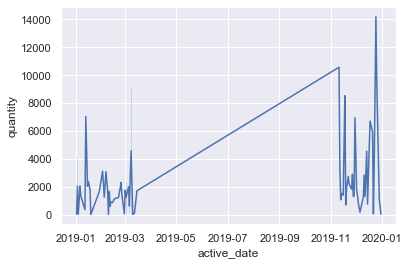

In [117]:
dfm_purchase_hg_size=dfm_purchase_hg[dfm_purchase_hg['size'].isin(list_size[:1])]
ax = sns.lineplot(x="active_date", y="quantity",data=dfm_purchase_hg_size)


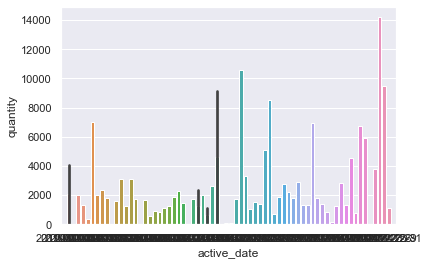

In [116]:
ax = sns.barplot(x="active_date", y="quantity",data=dfm_purchase_hg_size)

In [99]:
#dfm_purchase_cm.head(2)

In [119]:
list_type=list(dfm_purchase_cm['type'].unique())
list_size=list(dfm_purchase_cm['size'].unique())

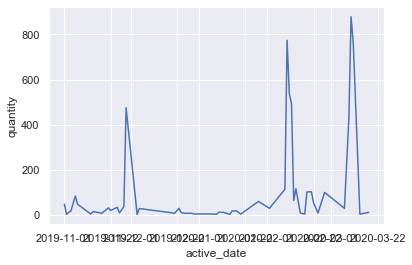

In [120]:
dfm_purchase_cm_size=dfm_purchase_cm[dfm_purchase_cm['size'].isin(list_size[:1])]
ax = sns.lineplot(x="active_date", y="quantity",data=dfm_purchase_cm_size)

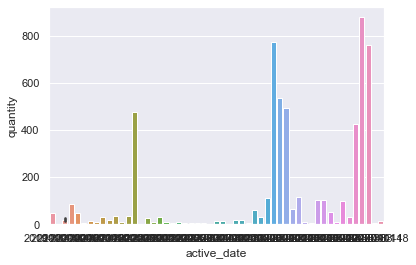

In [121]:
ax = sns.barplot(x="active_date", y="quantity",data=dfm_purchase_cm_size)

In [100]:
# Material # ['type','size','quantity','active_date']
#dfm_order_hg,dfm_order_cm, dfm_purchase_hg,dfm_purchase_cm

# Bài toán như sau 
### Có tập dữ liệu Giá or Khối lượng với các thuộc tinh ( trường dữ liệu) ngày,tháng, quý, năm , mùa vụ , quốc gia
### xác định các trường tương quan với Giá/Khối lượng tiêu thụ tại các nước như thế nào với Thời gian, mùa vụ 
### --> Nếu có tương quan thì phân bố xác suất gần là gì ? 
### --> Hướng dụng dụng trong dự báo như thế nào